### Matrix Factorization and Validating Your Predictions

In [6]:
import pandas as pd
import matplotlib as plt
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np


user_ratings_df=pd.read_csv('user_ratings.csv')

In [7]:
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
number_of_empty=user_ratings_df.isnull().values.sum()

In [9]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.0


AttributeError: module 'matplotlib' has no attribute 'show'

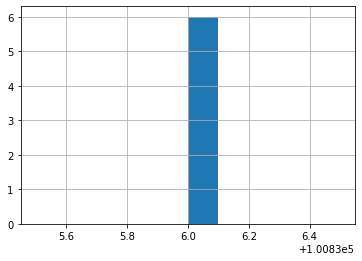

In [10]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()

# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()


In [11]:
import numpy as np

# Multiply the user and item matrices
predictions_df = np.dot(user_matrix, item_matrix)
# Inspect the recreated DataFrame
print(predictions_df)

# Inspect the original DataFrame and compare
print(original_df)


[[4.99975742 4.00002481 3.00049612 1.99995591 0.99971313]
 [1.9460952  1.00551227 4.11024369 3.99020218 4.93625288]
 [0.97027585 3.00303957 3.06079051 4.99459729 3.9648486 ]
 [4.01506894 4.99845906 2.96918168 1.00273895 2.01782033]
 [1.06960909 0.99288182 3.8576386  5.01265226 5.08231881]]
        Alien  Scream  Scream 2  Love Actually  The Notebook
User_1    5.0     4.0       3.0            2.0           1.0
User_2    2.0     1.0       4.0            4.0           5.0
User_3    1.0     3.0       3.0            5.0           4.0
User_4    4.0     5.0       3.0            1.0           2.0
User_5    1.0     1.0       4.0            5.0           5.0

SyntaxError: invalid syntax (<ipython-input-11-f912b6a22cfb>, line 12)

In [12]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

In [1]:
# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)



NameError: name 'user_ratings_df' is not defined

In [3]:
# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

NameError: name 'user_ratings_centered' is not defined

In [1]:
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

NameError: name 'user_ratings_centered' is not defined

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(original_df)


#Find the highest ranked movies for User_5 by sorting all the reviews generated for User_5 from high to low.

# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['User_5',:].sort_values(ascending=False)

print(user_5_ratings)



In [ ]:
# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

3.622399787897257
1.6415371001781351